<a href="https://colab.research.google.com/github/khanabdulmajid/CNN/blob/master/10_Time__Series_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Get Data Bitcoin

In [2]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2024-03-10 17:02:11--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.01s   

2024-03-10 17:02:11 (17.4 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



In [3]:
#importing time series data with panda

import pandas as pd

df = pd.read_csv("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv",
                 parse_dates=["Date"],
                 index_col=["Date"]
                 )


In [4]:
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [6]:
bitcoin_prices = pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)": "Price"})
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


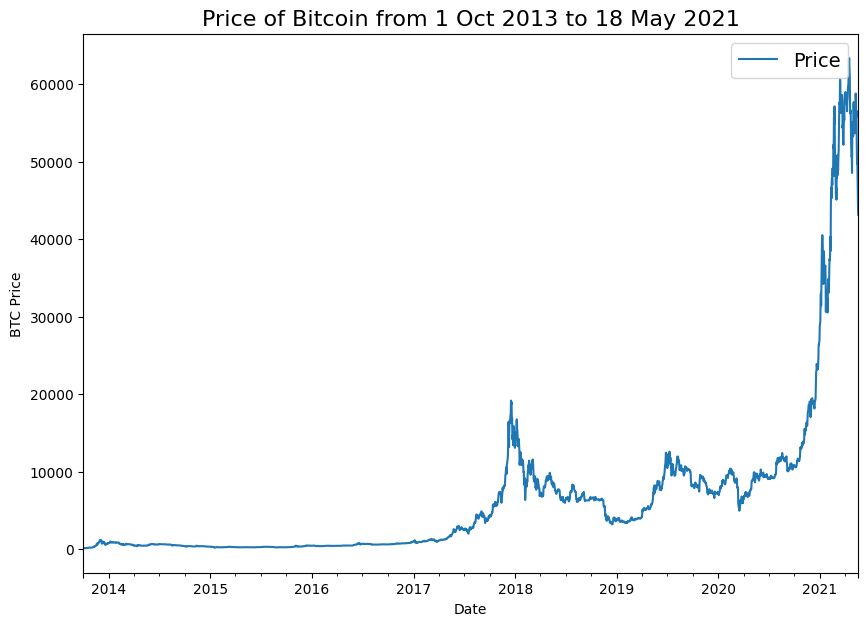

In [7]:
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize=(10, 7))
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin from 1 Oct 2013 to 18 May 2021", fontsize=16)
plt.legend(fontsize=14);

In [8]:
df.index.to_numpy()

array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
       '2013-10-03T00:00:00.000000000', ...,
       '2021-05-16T00:00:00.000000000', '2021-05-17T00:00:00.000000000',
       '2021-05-18T00:00:00.000000000'], dtype='datetime64[ns]')

In [9]:
# Importing and formatting historical Bitcoin data with Python
timesteps=df.index.to_numpy()
btc_price=df["Closing Price (USD)"].to_numpy()

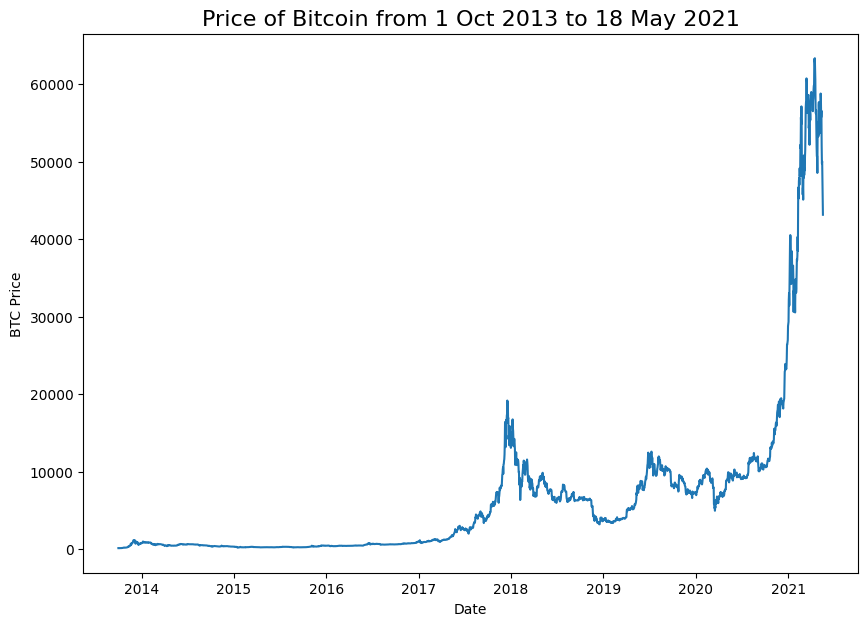

In [10]:

# Plot from CSV
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10, 7))
plt.plot(timesteps, btc_price)
plt.title("Price of Bitcoin from 1 Oct 2013 to 18 May 2021", fontsize=16)
plt.xlabel("Date")
plt.ylabel("BTC Price");

In [11]:
# without using pandas
import csv
import datetime
timesteps=[]
btc_prices=[]
with open("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv","r") as f:
  csv_reader= csv.reader(f,delimiter=",")
  next(csv_reader)
  for line in csv_reader:
    timesteps.append(datetime.datetime.strptime(line[1],"%Y-%m-%d"))
    btc_prices.append(float(line[2]))


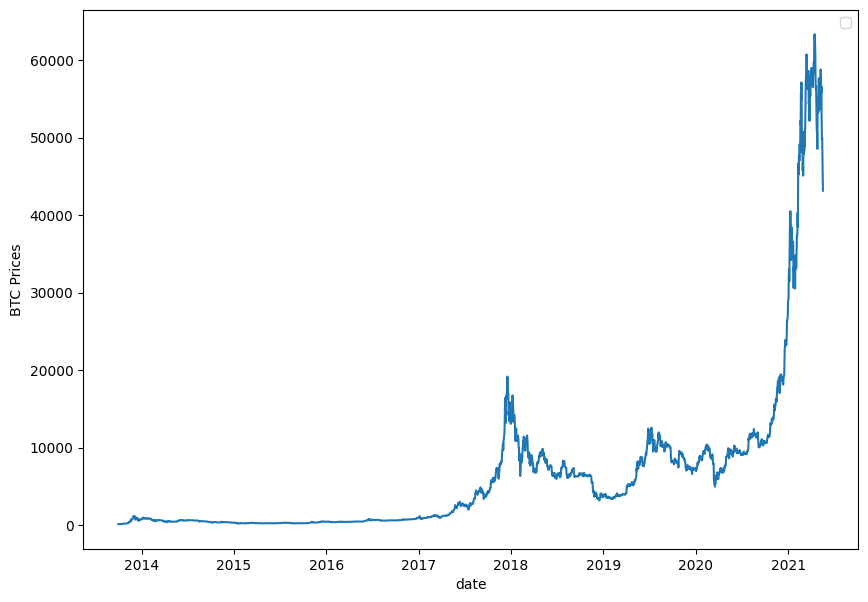

In [12]:
plt.figure(figsize=(10,7))
plt.plot(timesteps,btc_prices)
plt.ylabel("BTC Prices")
plt.xlabel("date")
plt.legend()

In [13]:
#How to split this date, it cannot be shuffled
from sklearn.model_selection import train_test_split
timesteps=df.index.to_numpy()
prices=df['Closing Price (USD)'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(timesteps,prices,
                                                    test_size=0.2,
                                                    random_state=42)
X_train.shape, X_test.shape, y_train.shape,y_test.shape


((2229,), (558,), (2229,), (558,))

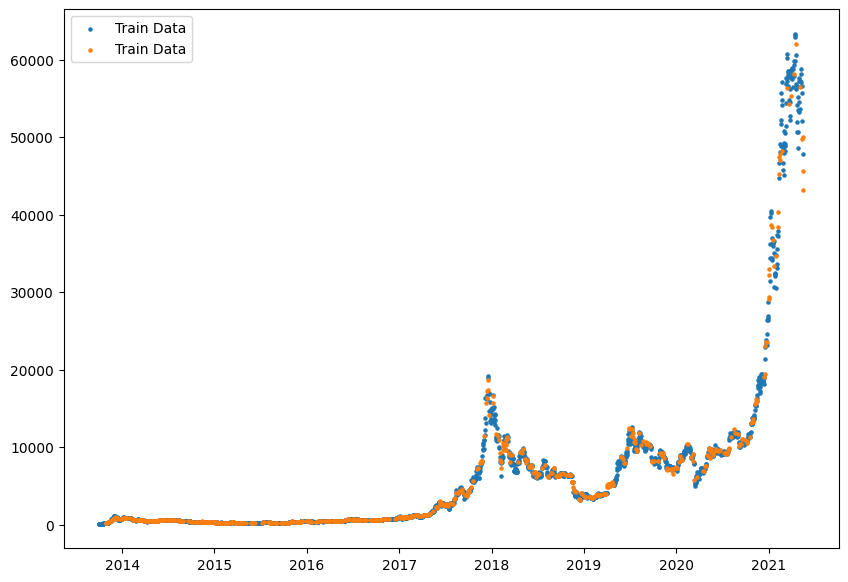

In [14]:
# lets plot wrong train_test_split
plt.figure(figsize=(10,7))
plt.scatter(X_train,y_train,s=5,label="Train Data")
plt.scatter(X_test,y_test,s=5,label="Train Data")
plt.legend()

In [15]:
# why is this wrong way to split data.
# this is a Random split             --*---**---**---*------*-----***--*
# this is a Time Series split        -------------------------**********


#create train and test splits the right way for timeseriesdata
split_size=int(0.8 * len(prices))

# create train data splits
X_train,y_train=timesteps[:split_size],prices[:split_size]
X_test,y_test=timesteps[split_size:],prices[split_size:]

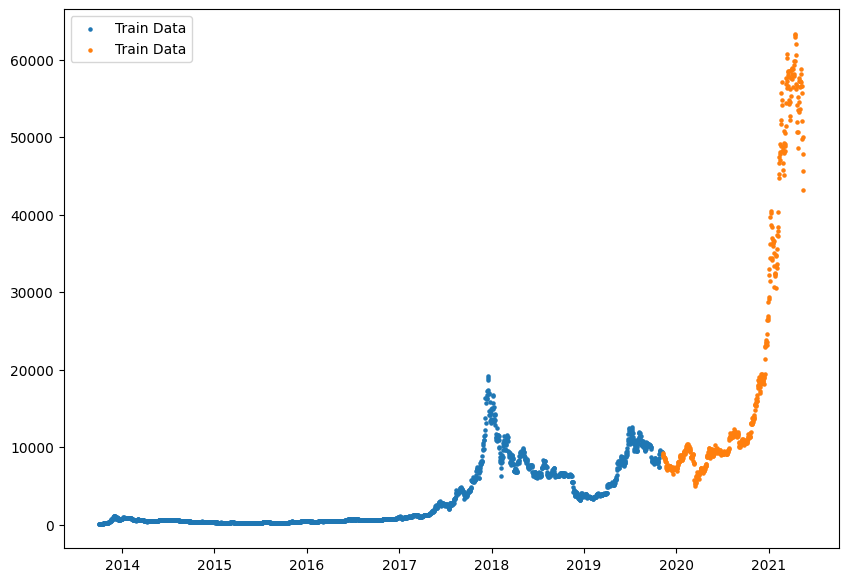

In [16]:
# lets plot wrong train_test_split
plt.figure(figsize=(10,7))
plt.scatter(X_train,y_train,s=5,label="Train Data")
plt.scatter(X_test,y_test,s=5,label="Train Data")
plt.legend()

In [17]:
def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
  """
  Plots a timesteps (a series of points in time) against values (a series of values across timesteps).

  Parameters
  ---------
  timesteps : array of timesteps
  values : array of values across time
  format : style of plot, default "."
  start : where to start the plot (setting a value will index from start of timesteps & values)
  end : where to end the plot (setting a value will index from end of timesteps & values)
  label : label to show on plot of values
  """
  # Plot the series
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14) # make label bigger
  plt.grid(True)

In [18]:
# how is lstm goiing to predict this
# how will any other ml algorithm predict this

# some Terms to Familiarize,

*   Horizon = Number of timesteps into the future we're going to prediict

*   Window_size= number of timesteps we're going to use to predict the horizon




Modelling Experiments

We can build almost any kind of model for our problem as long as the data inputs and outputs are formatted correctly.

However, just because we can build almost any kind of model, doesn't mean it'll perform well/should be used in a production setting.

We'll see what this means as we build and evaluate models throughout.

Before we discuss what modelling experiments we're going to run, there are two terms you should be familiar with, horizon and window.

    horizon = number of timesteps to predict into future
    window = number of timesteps from past used to predict horizon

For example, if we wanted to predict the price of Bitcoin for tomorrow (1 day in the future) using the previous week's worth of Bitcoin prices (7 days in the past), the horizon would be 1 and the window would be 7.

Now, how about those modelling experiments?
Model Number 	Model Type 	Horizon size 	Window size 	Extra data
0 	Naïve model (baseline) 	NA 	NA 	NA
1 	Dense model 	1 	7 	NA
2 	Same as 1 	1 	30 	NA
3 	Same as 1 	7 	30 	NA
4 	Conv1D 	1 	7 	NA
5 	LSTM 	1 	7 	NA
6 	Same as 1 (but with multivariate data) 	1 	7 	Block reward size
7 	N-BEATs Algorithm 	1 	7 	NA
8 	Ensemble (multiple models optimized on different loss functions) 	1 	7 	NA
9 	Future prediction model (model to predict future values) 	1 	7 	NA
10 	Same as 1 (but with turkey 🦃 data introduced) 	1 	7 	NA

    🔑 Note: To reiterate, as you can see, we can build many types of models for the data we're working with. But that doesn't mean that they'll perform well. Deep learning is a powerful technique but it doesn't always work. And as always, start with a simple model first and then add complexity as needed.

Model 0: Naïve forecast (baseline)

As usual, let's start with a baseline.

One of the most common baseline models for time series forecasting, the naïve model (also called the naïve forecast), requires no training at all.

That's because all the naïve model does is use the previous timestep value to predict the next timestep value.

The formula looks like this:

In English:

    The prediction at timestep t (y-hat) is equal to the value at timestep t-1 (the previous timestep).

Sound simple?

Maybe not.

In an open system (like a stock market or crypto market), you'll often find beating the naïve forecast with any kind of model is quite hard.

    🔑 Note: For the sake of this notebook, an open system is a system where inputs and outputs can freely flow, such as a market (stock or crypto). Where as, a closed system the inputs and outputs are contained within the system (like a poker game with your buddies, you know the buy in and you know how much the winner can get). Time series forecasting in open systems is generally quite poor.


#Naive Model
y<sub>t</sub> = y <sub>t-1</sub>





In [19]:
def make_preds(model, input_data):
  """
  Uses model to make predictions on input_data.

  Parameters
  ----------
  model: trained model
  input_data: windowed input data (same kind of data model was trained on)

  Returns model predictions on input_data.
  """
  forecast = model.predict(input_data)
  return tf.squeeze(forecast) # return 1D array of predictions


In [20]:
# Create a naïve forecast
naive_forecast = y_test[:-1] # Naïve forecast equals every value excluding the last value
naive_forecast[:10], naive_forecast[-10:] # View frist 10 and last 10

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]))

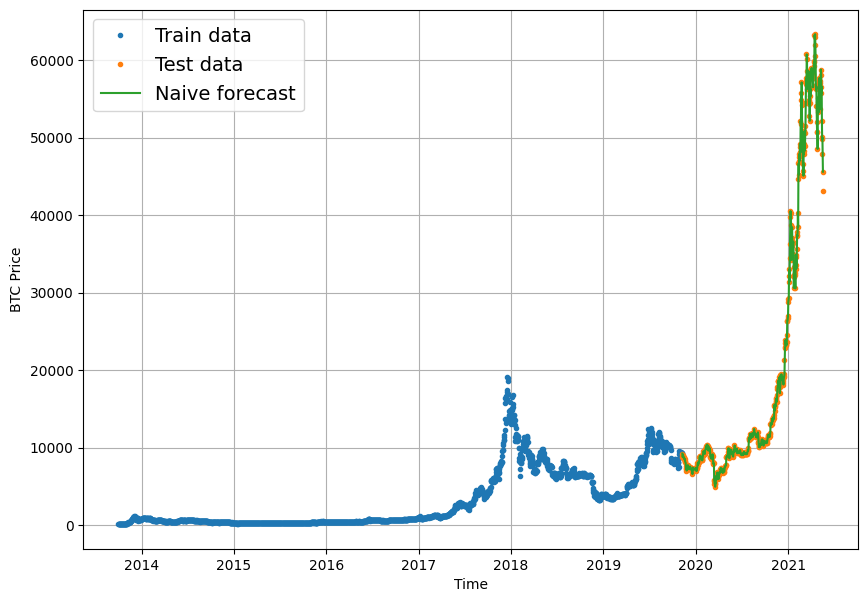

In [21]:
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", label="Naive forecast");

# Metrics for measuring error
* mse
* mae
* rmse
* mape/sMape
* MASE

In [22]:
# MASE implemented courtesy of sktime - https://github.com/alan-turing-institute/sktime/blob/ee7a06843a44f4aaec7582d847e36073a9ab0566/sktime/performance_metrics/forecasting/_functions.py#L16
def mean_absolute_scaled_error(y_true, y_pred):
  """
  Implement MASE (assuming no seasonality of data).
  """
  mae = tf.reduce_mean(tf.abs(y_true - y_pred))

  # Find MAE of naive forecast (no seasonality)
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) # our seasonality is 1 day (hence the shifting of 1 day)

  return mae / mae_naive_no_season

In [23]:
def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred) # puts and emphasis on outliers (all errors get squared)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)
  if mae.ndim>0:
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)


  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [24]:
import tensorflow as tf
naive_results = evaluate_preds(y_true=y_test[1:],
                               y_pred=naive_forecast)
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

In [25]:
# Find average price of Bitcoin in test dataset
tf.reduce_mean(y_test).numpy()

20056.632963737222

In [26]:
# MASE implemented courtesy of sktime - https://github.com/alan-turing-institute/sktime/blob/ee7a06843a44f4aaec7582d847e36073a9ab0566/sktime/performance_metrics/forecasting/_functions.py#L16
def mean_absolute_scaled_error(y_true, y_pred):
  """
  Implement MASE (assuming no seasonality of data).
  """
  mae = tf.reduce_mean(tf.abs(y_true - y_pred))

  # Find MAE of naive forecast (no seasonality)
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) # our seasonality is 1 day (hence the shifting of 1 day)

  return mae / mae_naive_no_season

In [27]:


def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred) # puts and emphasis on outliers (all errors get squared)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}



In [28]:


naive_results = evaluate_preds(y_true=y_test[1:],
                               y_pred=naive_forecast)
naive_results



{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

In [29]:
#what do we want toi do with our bitcoin data
print(f"We want to use: {btc_price[:7]} to predict this: {btc_price[7]}")

We want to use: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] to predict this: 123.033


In [30]:
0.#create function to label windowed dataa
btc_price[:10]

array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
       121.795  , 123.033  , 124.049  , 125.96116])

In [31]:
btc_price[:-7]

array([  123.65499   ,   125.455     ,   108.58483   , ...,
       58788.20967893, 58102.19142623, 55715.54665129])

In [32]:
#lets setup global variables for window and horizon size
HORIZON=1
WINDOW_SIZE=7

def get_labelled_window(x, horizon=HORIZON):

  """
  crteates labelled data
  if horizon =1
  input=[1,2,3,4,5,6]  output: ([1, 2, 3, 4, 5, 6],[7])
  """

  return x[:,:-horizon], x[:,-horizon:]

In [33]:
# print(f"we want ot use: {btc_price[:,:-5]}\n to predict: {btc_price[5]}")

In [34]:
test_window,test_label=get_labelled_window(tf.expand_dims(tf.range(8),axis=0))

In [35]:
print(f" this is {test_window} to predict {test_label}")

 this is [[0 1 2 3 4 5 6]] to predict [[7]]


In [36]:
print(f" this is {tf.squeeze(test_window)} to predict {tf.squeeze(test_label)}")

 this is [0 1 2 3 4 5 6] to predict 7


Our Function will
1. Create a window srep of specific window size eg ([1,2,3,4,5,6])
2.
Use numPy indexing to create a 2D array of multiple window steps, for example:
```
[
[0,1,2,3,4,5,6],
[1,2,3,4,5,6,7],
[2,3,4,5,6,7,8],
]
```
3. Uses the 2D array of multiple window step (from 2.) to index on a target series (e.g. the historical price of bitcoin)
4. Uses out 1get labelled_windows()` finction we created above to turn the window steps into windows with specified horizon

In [37]:
# fast and robust sliding eindow optimization
# https://towardsdatascience.com/fast-and-robust-sliding-window-vectorization-with-numpy-3ad950ed62f5

In [38]:
window_size=7
horizon=1
window_step = np.expand_dims(np.arange(window_size+horizon),axis=0)

In [39]:
window_step

array([[0, 1, 2, 3, 4, 5, 6, 7]])

In [40]:
# create a function toview numpy arrays as windows
def make_window(x,window_size=WINDOW_SIZE,horizon=HORIZON):
  window_step = np.expand_dims(np.arange(window_size+horizon),axis=0)

  window_indexes=window_step+np.expand_dims(np.arange(len(x)-(window_size+horizon-1)),axis=0).T

  windowed_array=x[window_indexes]

  windows,labels = get_labelled_window(x=windowed_array,horizon=horizon)
  return windows,labels

In [41]:
# window_step = np.expand_dims(np.arange(WINDOW_SIZE+HORIZON),axis=0)

In [42]:
# window_indexes=window_step + np.expand_dims(np.arange(len(btc_price)-7),axis=0)

In [43]:
full_windows,full_labels = make_window(btc_price,WINDOW_SIZE,HORIZON)

In [44]:
def make_train_test_split(x,label,test_split=0.2):
  """
  splitting time series data in a sequential manner (temporal data)
  """
  split_size=int(len(x)*(1-test_split))
  train_window = x[:split_size]
  train_label = label[:split_size]
  test_window = x[split_size:]
  test_label = label[split_size:]
  return train_window, train_label, test_window, test_label

In [45]:
train_window, train_label, test_window, test_label = make_train_test_split(full_windows,full_labels)

In [46]:
len(train_window)

2224

In [47]:
len(full_windows)

2780

In [48]:
len(full_windows)*0.8

2224.0

#Make a modelling checkpoint

Because our model's performance will fluctuate from experiment to
experiment, we're going to write a model checkpoint so we
can comapre apples to apples

More specifically, we want to comapre each of our model's best
performance against the other model's best performance

In [49]:
import os
def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name), # create filepath to save model
                                            verbose=0, # only output a limited amount of text
                                            monitor="val_loss",
                                            save_best_only=True)


#Model Eval

In [50]:
def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  # Account for different sized metrics (for longer horizons, reduce to single number)
  if mae.ndim > 0: # if mae isn't already a scalar, reduce it to one by aggregating tensors to mean
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}


#Model 1

In [51]:
import tensorflow as tf
from tensorflow.keras import layers

tf.random.set_seed(42)
 # construct mnodel
model_1= tf.keras.Sequential([
     layers.Dense(128,activation="relu"),
     layers.Dense(HORIZON,activation='linear')

 ],name= "model_1_dense")

 #compile
model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae","mse"])

model_1_history=model_1.fit(x=train_window,
             y=train_label,
             epochs=100,
             verbose=1,
             batch_size=32,
             validation_data=(test_window,test_label),
             callbacks=([create_model_checkpoint(model_name=model_1.name)])

 )

Epoch 1/100
70/70 [==============================] - 4s 15ms/step - loss: 334.5796 - mae: 334.5796 - mse: 618158.9375 - val_loss: 1034.5874 - val_mae: 1034.5874 - val_mse: 3079893.2500
Epoch 2/100
70/70 [==============================] - 1s 9ms/step - loss: 167.6532 - mae: 167.6532 - mse: 146616.4688 - val_loss: 807.9460 - val_mae: 807.9460 - val_mse: 2096104.7500
Epoch 3/100
70/70 [==============================] - 1s 9ms/step - loss: 154.1454 - mae: 154.1454 - mse: 129968.2422 - val_loss: 765.2101 - val_mae: 765.2101 - val_mse: 1852569.7500
Epoch 4/100
70/70 [==============================] - 1s 10ms/step - loss: 142.3355 - mae: 142.3355 - mse: 106633.8047 - val_loss: 751.5433 - val_mae: 751.5433 - val_mse: 1873251.3750
Epoch 5/100
70/70 [==============================] - 0s 4ms/step - loss: 138.7489 - mae: 138.7489 - mse: 104229.0625 - val_loss: 821.0036 - val_mae: 821.0036 - val_mse: 1941740.2500
Epoch 6/100
70/70 [==============================] - 1s 9ms/step - loss: 138.0878 - ma

In [52]:
model_1.evaluate(test_window,test_label)

18/18 [==============================] - 0s 2ms/step - loss: 650.8276 - mae: 650.8276 - mse: 1338920.8750


[650.8275756835938, 650.8275756835938, 1338920.875]

In [53]:
model_1_load=tf.keras.models.load_model("/content/model_experiments/model_1_dense/")

In [54]:
model_1_load.evaluate(test_window,test_label)

18/18 [==============================] - 0s 2ms/step - loss: 562.4132 - mae: 562.4132 - mse: 1144858.3750


[562.4132080078125, 562.4132080078125, 1144858.375]

# Model 2

In [55]:
window_size=30
horizon=1
full_window,full_label=make_window(btc_price,window_size=window_size,horizon=horizon)
train_window, train_label, test_window, test_label = make_train_test_split(full_window,full_label)

In [56]:
import tensorflow as tf
from tensorflow.keras import layers

tf.random.set_seed(42)
 # construct mnodel
model_2= tf.keras.Sequential([
     layers.Dense(128,activation="relu"),
     layers.Dense(HORIZON,activation='linear')

 ],name= "model_2_dense")

 #compile
model_2.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae","mse"])

model_2_history=model_2.fit(x=train_window,
             y=train_label,
             epochs=100,
             verbose=1,
             batch_size=32,
             validation_data=(test_window,test_label),
             callbacks=([create_model_checkpoint(model_name=model_2.name)])

 )

Epoch 1/100
69/69 [==============================] - 2s 12ms/step - loss: 932.9224 - mae: 932.9224 - mse: 7380192.0000 - val_loss: 1628.7959 - val_mae: 1628.7959 - val_mse: 6838147.0000
Epoch 2/100
69/69 [==============================] - 0s 4ms/step - loss: 207.3520 - mae: 207.3520 - mse: 209186.1250 - val_loss: 1662.8461 - val_mae: 1662.8461 - val_mse: 6619453.5000
Epoch 3/100
69/69 [==============================] - 1s 9ms/step - loss: 223.9636 - mae: 223.9636 - mse: 214548.2812 - val_loss: 988.2927 - val_mae: 988.2927 - val_mse: 3000156.7500
Epoch 4/100
69/69 [==============================] - 0s 4ms/step - loss: 172.9350 - mae: 172.9350 - mse: 137264.8750 - val_loss: 1258.5680 - val_mae: 1258.5680 - val_mse: 4693454.0000
Epoch 5/100
69/69 [==============================] - 1s 9ms/step - loss: 184.4456 - mae: 184.4456 - mse: 149642.2969 - val_loss: 846.1325 - val_mae: 846.1325 - val_mse: 2337691.2500
Epoch 6/100
69/69 [==============================] - 1s 10ms/step - loss: 154.4088

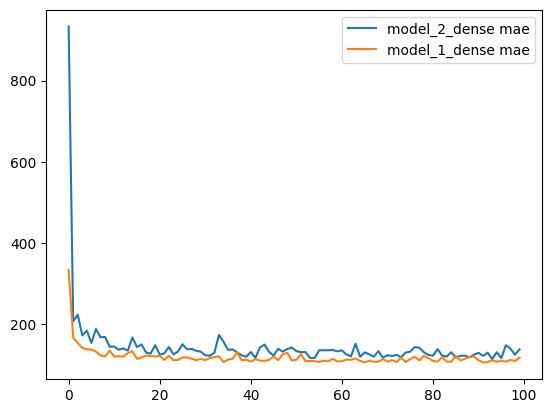

In [57]:
plt.plot(model_2_history.history["mae"],label=f"{model_2.name} mae")
plt.plot(model_1_history.history["mae"],label=f"{model_1.name} mae")
plt.legend()
plt.show()

# Model 3

In [58]:
window_size=30
horizon=7
full_window,full_label=make_window(btc_price,window_size=window_size,horizon=horizon)
train_window, train_label, test_window, test_label = make_train_test_split(full_window,full_label)


tf.random.set_seed(42)
 # construct mnodel
model_3= tf.keras.Sequential([
     layers.Dense(128,activation="relu"),
     layers.Dense(HORIZON,activation='linear')

 ],name= "model_3_dense")

 #compile
model_3.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae","mse"])

model_3_history=model_3.fit(x=train_window,
             y=train_label,
             epochs=100,
             verbose=1,
             batch_size=32,
             validation_data=(test_window,test_label),
             callbacks=([create_model_checkpoint(model_name=model_3.name)])

 )

Epoch 1/100
69/69 [==============================] - 2s 11ms/step - loss: 763.9323 - mae: 763.9323 - mse: 4248185.0000 - val_loss: 1501.6782 - val_mae: 1501.6782 - val_mse: 7302621.0000
Epoch 2/100
69/69 [==============================] - 0s 4ms/step - loss: 335.1936 - mae: 335.1936 - mse: 495196.6875 - val_loss: 1782.8384 - val_mae: 1782.8384 - val_mse: 8842753.0000
Epoch 3/100
69/69 [==============================] - 0s 4ms/step - loss: 304.9599 - mae: 304.9599 - mse: 421104.1875 - val_loss: 1591.8019 - val_mae: 1591.8019 - val_mse: 7477241.5000
Epoch 4/100
69/69 [==============================] - 0s 4ms/step - loss: 285.8512 - mae: 285.8512 - mse: 388123.3125 - val_loss: 1785.7206 - val_mae: 1785.7206 - val_mse: 9230320.0000
Epoch 5/100
69/69 [==============================] - 0s 4ms/step - loss: 281.7160 - mae: 281.7160 - mse: 367007.6562 - val_loss: 2061.2292 - val_mae: 2061.2292 - val_mse: 10743333.0000
Epoch 6/100
69/69 [==============================] - 1s 13ms/step - loss: 257

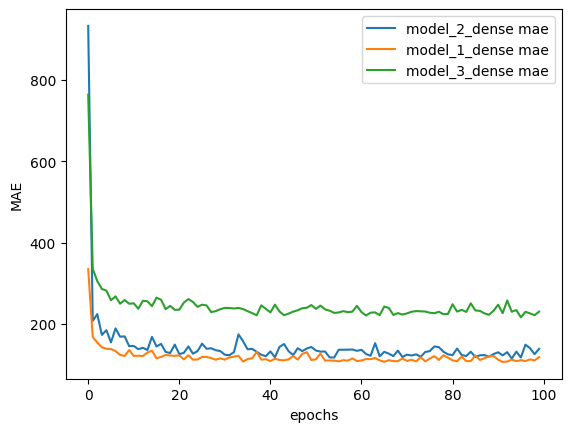

In [59]:
plt.plot(model_2_history.history["mae"],label=f"{model_2.name} mae")
plt.plot(model_1_history.history["mae"],label=f"{model_1.name} mae")
plt.plot(model_3_history.history["mae"],label=f"{model_3.name} mae")
plt.xlabel(xlabel="epochs")
plt.ylabel(ylabel="MAE")
plt.legend()
plt.show()

#model_5

In [60]:
window_size=30
horizon=1
full_window,full_label=make_window(btc_price,window_size=window_size,horizon=horizon)
train_window, train_label, test_window, test_label = make_train_test_split(full_window,full_label)


tf.random.set_seed(42)
 # construct mnodel many to one
inputs= tf.keras.Input(shape=(window_size,horizon))
# x=tf.keras.layers.LSTM(128,activation="tanh",return_sequences=True)(inputs)
x=tf.keras.layers.LSTM(128,activation="relu")(inputs)
output=tf.keras.layers.Dense(horizon)(x)
model_5=tf.keras.Model(inputs=inputs,outputs=output,name="model_5")




 #compile
model_5.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
               )

model_5_history=model_5.fit(x=train_window,
             y=train_label,
             epochs=100,
             verbose=0,
             batch_size=128,
             validation_data=(test_window,test_label),
             callbacks=([create_model_checkpoint(model_name=model_5.name)])

 )

In [61]:
model_5 = tf.keras.models.load_model("model_experiments/model_5")
model_5.evaluate(test_window, test_label)

18/18 [==============================] - 0s 6ms/step - loss: 1867.9988


1867.998779296875

In [62]:
model_5_preds = make_preds(model_5, test_window)
model_5_preds[:10]

18/18 [==============================] - 0s 6ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 9388.826,  9239.191,  9380.667,  9390.614,  9427.419, 10111.097,
        9271.584,  9153.932,  9588.222,  8812.159], dtype=float32)>

In [63]:
evaluate_preds(y_true=test_label,y_pred=model_5_preds,)

{'mae': 16826.77,
 'mse': 601242240.0,
 'rmse': 23315.387,
 'mape': 108.348785,
 'mase': 29.413363}

In [64]:
model3 = tf.keras.models.load_model("model_experiments/model_3_dense")
model3_preds=make_preds(model3, train_window)

69/69 [==============================] - 0s 2ms/step


In [65]:
evaluate_preds(y_true=test_label,y_pred=model3_preds)

{'mae': 17292.404,
 'mse': 609775400.0,
 'rmse': 17790.928,
 'mape': 77.502815,
 'mase': 30.227293}

In [66]:
model1 = tf.keras.models.load_model("model_experiments/model_1_dense")
model1_preds=make_preds(model1, train_window)

ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2440, in predict_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2425, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2413, in run_step  **
        outputs = model.predict_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2381, in predict_step
        return self(x, training=False)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "model_1_dense" is incompatible with the layer: expected shape=(None, 7), found shape=(None, 30)


#NBeats Algorithm

In [67]:
class NBeats(tf.keras.layers.Layer):
  def __init__(self, input_size,
               theta_size,horizon,
               n_neurons, n_layers,
               **kwargs):
# the **kwargs argument takes care of all of the
# arguments for the parent class (input_shape, trainable, name)
    super().__init__(**kwargs)
    self.input_size = input_size
    self.theta_size = theta_size
    self.horizon = horizon
    self.n_neurons = n_neurons
    self.n_layers = n_layers

    self.hidden = tf.keras.layers.Dense(theta_size, activation ="linear", name="theta")
  def call(self, inputs):
    x =inputs
    for layer in self.hidden:
      x=layer(x)
    theta =self.theta_layer(x)
    backcast, forecast = theta[:, :self.input_size], theta[:,-self.horizon:]

